### 컨볼루션 층 테스트

In [7]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.layers import Convolution

image = np.arange(16).reshape(1,1,4,4)
print(image.shape)
print(image)

W = np.ones((1,1,2,2))
print(W)
b = np.full((1,), 3)
print(b)
conv = Convolution(W, b)
out = conv.forward(image)
print(out.shape)
print(out)

(1, 1, 4, 4)
[[[[ 0  1  2  3]
   [ 4  5  6  7]
   [ 8  9 10 11]
   [12 13 14 15]]]]
[[[[1. 1.]
   [1. 1.]]]]
[3]
(1, 1, 3, 3)
[[[[13. 17. 21.]
   [29. 33. 37.]
   [45. 49. 53.]]]]


### 다차원 배열의 연산

In [8]:
import numpy as np
a = np.arange(12).reshape(2,2,3)
print(a.shape)
print(a)

(2, 2, 3)
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


In [9]:
a = np.arange(12).reshape(2,2,3)
b = a.transpose(2, 1, 0)
print(b.shape)
print(b)

(3, 2, 2)
[[[ 0  6]
  [ 3  9]]

 [[ 1  7]
  [ 4 10]]

 [[ 2  8]
  [ 5 11]]]


In [10]:
a = np.arange(12).reshape(2,2,3)
b = a.transpose(1, 0, 2)
print(b.shape) # (2,2,3)
print(b)

(2, 2, 3)
[[[ 0  1  2]
  [ 6  7  8]]

 [[ 3  4  5]
  [ 9 10 11]]]


In [11]:
a = np.arange(12).reshape(2,2,3)
b = a.transpose(0, 2, 1)
print(b.shape) # (2,3,2)
print(b)

(2, 3, 2)
[[[ 0  3]
  [ 1  4]
  [ 2  5]]

 [[ 6  9]
  [ 7 10]
  [ 8 11]]]


In [13]:
a = np.arange(12).reshape(2,2,3)
b = a.transpose(2, 0, 1)
print(b.shape) 
print(b)

(3, 2, 2)
[[[ 0  3]
  [ 6  9]]

 [[ 1  4]
  [ 7 10]]

 [[ 2  5]
  [ 8 11]]]


### im2col 함수 테스트

In [17]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.util import im2col

x1 = np.random.rand(1, 3, 7, 7)
col1 = im2col(x1, 5, 5)
print(col1.shape)

x2 = np.random.rand(10, 3, 7, 7)
col2 = im2col(x2, 5, 5)
print(col2.shape)

x3 = np.random.rand(2, 4, 5, 5)
col2 = im2col(x3, 2, 2)
print(col2.shape)

(9, 75)
(90, 75)
(32, 16)


### np.pad() 의 동작

In [24]:
import numpy as np
pad=0
input_data = np.arange(9).reshape((1,1,3,3))
print(input_data)
img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
print(img)

[[[[0 1 2]
   [3 4 5]
   [6 7 8]]]]
[[[[0 1 2]
   [3 4 5]
   [6 7 8]]]]


### 파이썬의 슬라이스 문법

In [26]:
a = np.array([1,2,3])
print(a[0])
print(a[0:1])

1
[1]


In [27]:
a = np.array([[1,2],[3,4]])
print(a[0])   # [1 2]
print(a[0:1]) # [[1 2]]

[1 2]
[[1 2]]


In [29]:
a = np.arange(9).reshape(1,1,3,3)
print(a.shape)  # (1, 1, 3, 3)
a = a[:, :, 0:2:1, 0:2:1]
print(a.shape) #  (1, 1, 2, 2)

(1, 1, 3, 3)
(1, 1, 2, 2)


In [32]:
a = np.zeros(16).reshape(1,1,2,2,2,2)
print(a.shape)  # (1, 1, 2, 2, 2, 2)
a = a[:, :, 0, 0, :, :]
print(a.shape)

(1, 1, 2, 2, 2, 2)
(1, 1, 2, 2)


In [33]:
image = np.arange(9).reshape(1,1,3,3)
col = np.zeros(16).reshape(1,1,2,2,2,2)

col[:, :, 0, 0, :, :] = image[:, :, 0:2:1, 0:2:1]
print(col) 

[[[[[[0. 1.]
     [3. 4.]]

    [[0. 0.]
     [0. 0.]]]


   [[[0. 0.]
     [0. 0.]]

    [[0. 0.]
     [0. 0.]]]]]]


### input 채널이 1개인 경우

In [22]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
pad=0
input_data = np.array([[[[1,1,1],
                         [2,2,2],
                         [3,3,3]]]])
img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
col = np.zeros((1, 1, 2, 2, 2, 2))

# print(img.shape)
# print(img)
# print(col.shape)
# print(img[:, :, 0:2:1, 0:2:1])
col[:, :, 0, 0, :, :] = img[:, :, 0:2:1, 0:2:1]
col[:, :, 0, 1, :, :] = img[:, :, 0:2:1, 1:3:1]
col[:, :, 1, 0, :, :] = img[:, :, 1:3:1, 0:2:1]
col[:, :, 1, 1, :, :] = img[:, :, 1:3:1, 1:3:1]

print(col)
ret = col.transpose(0, 4, 5, 1, 2, 3)
# # print(ret.shape)
print(ret)
ret1 = ret.reshape( 1*2*2, -1 )
# print(ret1.shape)
print(ret1)

# W = np.ones((1,1,2,2))
# print(W)
# W = W.reshape(1,-1).T
# print(W)
# print( np.dot(ret1, W) )

[[[[[[1. 1.]
     [2. 2.]]

    [[1. 1.]
     [2. 2.]]]


   [[[2. 2.]
     [3. 3.]]

    [[2. 2.]
     [3. 3.]]]]]]
[[[[[[1. 1.]
     [2. 2.]]]


   [[[1. 1.]
     [2. 2.]]]]



  [[[[2. 2.]
     [3. 3.]]]


   [[[2. 2.]
     [3. 3.]]]]]]
[[1. 1. 2. 2.]
 [1. 1. 2. 2.]
 [2. 2. 3. 3.]
 [2. 2. 3. 3.]]


### input 채널이 2개인 경우

In [26]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
pad=0
input_data = np.arange(18).reshape((1,2,3,3))
img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
col = np.zeros((1, 2, 2, 2, 2, 2))

# print(img.shape)
# print(img)
# print(col.shape)
# print(img[:, :, 0:2:1, 0:2:1])
# print(col)
col[:, :, 0, 0, :, :] = img[:, :, 0:2:1, 0:2:1]
col[:, :, 0, 1, :, :] = img[:, :, 0:2:1, 1:3:1]
col[:, :, 1, 0, :, :] = img[:, :, 1:3:1, 0:2:1]
col[:, :, 1, 1, :, :] = img[:, :, 1:3:1, 1:3:1]

# print(col)
ret = col.transpose(0, 4, 5, 1, 2, 3)
# # print(ret.shape)
# # print(ret)
ret1 = ret.reshape( 1*2*2, -1 )
print(ret1.shape)
# # print(ret1)

W = np.ones((1,2,2,2))
# # print(W)
W = W.reshape(1,-1).T
# # print(W)
print( np.dot(ret1, W) )

(4, 8)
[[52.]
 [60.]
 [76.]
 [84.]]


### input 그림이 2개, 채널이 2개, 필터가 3개인 경우

In [32]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
pad=0
input_data = np.arange(36).reshape((2,2,3,3))
img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
col = np.zeros((2, 2, 2, 2, 2, 2))

# print(img.shape)
# print(img)
# print(col.shape)
# print(img[:, :, 0:2:1, 0:2:1])
# print(col)
col[:, :, 0, 0, :, :] = img[:, :, 0:2:1, 0:2:1]
col[:, :, 0, 1, :, :] = img[:, :, 0:2:1, 1:3:1]
col[:, :, 1, 0, :, :] = img[:, :, 1:3:1, 0:2:1]
col[:, :, 1, 1, :, :] = img[:, :, 1:3:1, 1:3:1]

# print(col)
ret = col.transpose(0, 4, 5, 1, 2, 3)
# print(ret.shape)
# print(ret)
ret1 = ret.reshape( 2*2*2, -1 )
# # print(ret1.shape)
print(ret1)

W = np.ones((3,2,2,2))
# # # print(W)
W = W.reshape(3,-1).T
# # # print(W)
out_temp = np.dot(ret1, W) 
out = out_temp.reshape(2, 2, 2, -1).transpose(0, 3, 1, 2)
print(out.shape)

[[ 0.  1.  3.  4.  9. 10. 12. 13.]
 [ 1.  2.  4.  5. 10. 11. 13. 14.]
 [ 3.  4.  6.  7. 12. 13. 15. 16.]
 [ 4.  5.  7.  8. 13. 14. 16. 17.]
 [18. 19. 21. 22. 27. 28. 30. 31.]
 [19. 20. 22. 23. 28. 29. 31. 32.]
 [21. 22. 24. 25. 30. 31. 33. 34.]
 [22. 23. 25. 26. 31. 32. 34. 35.]]
(2, 3, 2, 2)


In [2]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
pad=0
input_data = np.arange(16).reshape((1,1,4,4))
img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
col = np.zeros((1, 1, 2, 2, 3, 3))

col[:, :, 0, 0, :, :] = img[:, :, 0:3:1, 0:3:1]
col[:, :, 0, 1, :, :] = img[:, :, 0:3:1, 1:4:1]
col[:, :, 1, 0, :, :] = img[:, :, 1:4:1, 0:3:1]
col[:, :, 1, 1, :, :] = img[:, :, 1:4:1, 1:4:1]

print(col)
ret = col.transpose(0, 4, 5, 1, 2, 3)
ret1 = ret.reshape( 3*3, -1 )
print(ret1)

[[[[[[ 0.  1.  2.]
     [ 4.  5.  6.]
     [ 8.  9. 10.]]

    [[ 1.  2.  3.]
     [ 5.  6.  7.]
     [ 9. 10. 11.]]]


   [[[ 4.  5.  6.]
     [ 8.  9. 10.]
     [12. 13. 14.]]

    [[ 5.  6.  7.]
     [ 9. 10. 11.]
     [13. 14. 15.]]]]]]
[[ 0.  1.  4.  5.]
 [ 1.  2.  5.  6.]
 [ 2.  3.  6.  7.]
 [ 4.  5.  8.  9.]
 [ 5.  6.  9. 10.]
 [ 6.  7. 10. 11.]
 [ 8.  9. 12. 13.]
 [ 9. 10. 13. 14.]
 [10. 11. 14. 15.]]


In [55]:
import numpy as np
def my_im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col
            
#input_data = np.arange(9).reshape((1,1,3,3))  
# input_data = np.arange(18).reshape((2,1,3,3))            
# input_data = np.arange(18).reshape((1,2,3,3))            
#input_data = np.arange(54).reshape((2,3,3,3))            
input_data = np.ones((100,1,28,28))
my_col = my_im2col(input_data, 5, 5)            
print(my_col.shape)            
# print(input_data.shape)

(57600, 25)


###  Convolution test

In [7]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *

w = np.ones((1,1,2,2))
# print(w)
b = np.full((1,), 3)
# print(b)
conv = Convolution(w, b)

x = np.arange(9).reshape((1,1,3,3))
out = conv.forward(x)
print(out)

[[[[11. 15.]
   [23. 27.]]]]


In [8]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *

w = np.ones((1,1,2,2))
# print(w)
b = np.full((1,), 3)
# print(b)
conv = Convolution(w, b)

x = np.arange(16).reshape((1,1,4,4))
out = conv.forward(x)
print(out)

[[[[13. 17. 21.]
   [29. 33. 37.]
   [45. 49. 53.]]]]


In [9]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *

w = np.ones((1,1,2,2))
# print(w)
b = np.full((1,), 3)
# print(b)
conv = Convolution(w, b, pad=1)

x = np.arange(9).reshape((1,1,3,3))
out = conv.forward(x)
print(out)

[[[[ 3.  4.  6.  5.]
   [ 6. 11. 15. 10.]
   [12. 23. 27. 16.]
   [ 9. 16. 18. 11.]]]]


In [19]:
def my_col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)
#     print(col)
#     print(col.shape)
    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

In [20]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.util import im2col, col2im

x1 = np.arange(16).reshape((1,1,4,4))
col = im2col(x1, 2, 2)
print(x1)
print(col)

x2 = my_col2im(col,x1.shape, 2, 2)
print(x2)

[[[[ 0  1  2  3]
   [ 4  5  6  7]
   [ 8  9 10 11]
   [12 13 14 15]]]]
[[ 0.  1.  4.  5.]
 [ 1.  2.  5.  6.]
 [ 2.  3.  6.  7.]
 [ 4.  5.  8.  9.]
 [ 5.  6.  9. 10.]
 [ 6.  7. 10. 11.]
 [ 8.  9. 12. 13.]
 [ 9. 10. 13. 14.]
 [10. 11. 14. 15.]]
[[[[ 0.  2.  4.  3.]
   [ 8. 20. 24. 14.]
   [16. 36. 40. 22.]
   [12. 26. 28. 15.]]]]


### 풀링 소스 분석

In [26]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.util import im2col
from common.util import col2im
from common.layers import Convolution

class MyPooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        print('col', col)
        col = col.reshape(-1, self.pool_h*self.pool_w)
        print('col', col)

        arg_max = np.argmax(col, axis=1)
        print('arg_max', arg_max)
        out = np.max(col, axis=1)
        print('out', out)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)
        print('out', out)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx

In [24]:
x = np.random.randint(1,16,(1,1,4,4))
print(x)

[[[[ 7 11 13 15]
   [ 3  4  2  3]
   [ 1  2 15  9]
   [ 1  8  3 10]]]]


In [28]:
pool = MyPooling(2,2,2)
pool.forward(x)

col [[ 7. 11.  3.  4.]
 [13. 15.  2.  3.]
 [ 1.  2.  1.  8.]
 [15.  9.  3. 10.]]
col [[ 7. 11.  3.  4.]
 [13. 15.  2.  3.]
 [ 1.  2.  1.  8.]
 [15.  9.  3. 10.]]
arg_max [1 1 3 0]
out [11. 15.  8. 15.]
out [[[[11. 15.]
   [ 8. 15.]]]]


array([[[[11., 15.],
         [ 8., 15.]]]])

In [30]:
dout = np.array([[[[1,2],
                   [3,4]]]])
dout = dout.transpose(0, 2, 3, 1)
print(dout.shape)
print(dout.size)
print(dout.flatten())

(1, 2, 2, 1)
4
[1 2 3 4]


In [31]:
pool_size = pool.pool_h * pool.pool_w
dmax = np.zeros((dout.size, pool_size))
dmax[np.arange(pool.arg_max.size), pool.arg_max.flatten()] = dout.flatten()
print(dmax)

[[0. 1. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 3.]
 [4. 0. 0. 0.]]


In [33]:
a = [1,2,3]+[4,5]
print(a)
b = "hello"+"world"
print(b)
c = (1,2,2,1)+(4,)
print(c)

[1, 2, 3, 4, 5]
helloworld
(1, 2, 2, 1, 4)


In [35]:
dmax = dmax.reshape(dout.shape + (pool_size,)) 
print(dmax.shape)
print(dmax)

(1, 2, 2, 1, 4)
[[[[[0. 1. 0. 0.]]

   [[0. 2. 0. 0.]]]


  [[[0. 0. 0. 3.]]

   [[4. 0. 0. 0.]]]]]


In [36]:
dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
print(dcol.shape)
print(dcol)

(4, 4)
[[0. 1. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 3.]
 [4. 0. 0. 0.]]


In [37]:
dx = my_col2im(dcol, (1,1,4,4), 2,2,2,0)
print(dx)

[[[[0. 1. 0. 2.]
   [0. 0. 0. 0.]
   [0. 0. 4. 0.]
   [0. 3. 0. 0.]]]]


In [38]:
dout = np.array([[[[1,2],
                   [3,4]]]])
dx = pool.backward(dout)
print(dx)

[[[[0. 1. 0. 2.]
   [0. 0. 0. 0.]
   [0. 0. 4. 0.]
   [0. 3. 0. 0.]]]]


In [42]:
import sys, os
sys.path.append(os.pardir)  
import numpy as np
from common.layers import Convolution

# input_data = np.arange(9).reshape((1,1,3,3)) 
# input_data = np.arange(18).reshape((1,2,3,3))  
input_data = np.arange(36).reshape((2,2,3,3))  
w1 = np.ones((3,2,2,2))
b1 = np.zeros(1)
conv = Convolution(w1, b1)
out = conv.forward(input_data)
print(out.shape)

(2, 3, 2, 2)


(333, 250)
(1, 1, 333, 250)
(30, 1, 5, 5)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)


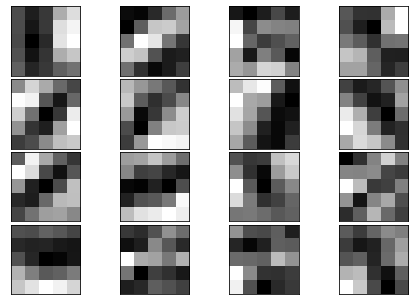

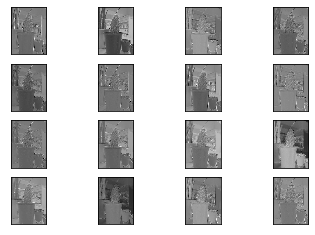

In [49]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet
from matplotlib.image import imread
from common.layers import Convolution

def filter_show(filters, nx=4, show_num=16):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(show_num / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(show_num):
        ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')


network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

# 학습된 가중치
network.load_params("params.pkl")

filter_show(network.params['W1'], 16)

img = imread('../dataset/cactus_gray.png')
print(img.shape)
img = img.reshape(1, 1, *img.shape)
print(img.shape)
fig = plt.figure()

w_idx = 1

print(network.params['W1'].shape)
for i in range(16):
    w = network.params['W1'][i]
    b = 0  # network.params['b1'][i]

    w = w.reshape(1, *w.shape)
    #b = b.reshape(1, *b.shape)
    conv_layer = Convolution(w, b) 
    out = conv_layer.forward(img)
    print(out.shape)
    out = out.reshape(out.shape[2], out.shape[3])
    
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(out, cmap=plt.cm.gray_r, interpolation='nearest')

plt.show()

In [50]:
import numpy as np
from simple_convnet import SimpleConvNet

network = SimpleConvNet(input_dim=(1,10, 10), 
                        conv_param = {'filter_num':10, 'filter_size':3, 'pad':0, 'stride':1},
                        hidden_size=10, output_size=10, weight_init_std=0.01)

X = np.random.rand(100).reshape((1, 1, 10, 10))
T = np.array([1]).reshape((1,1))

grad_num = network.numerical_gradient(X, T)
grad = network.gradient(X, T)

for key, val in grad_num.items():
    print(key, np.abs(grad_num[key] - grad[key]).mean())

W1 1.6378990491090084e-10
b1 3.014825766096095e-10
W2 2.3467965930724185e-11
b2 2.4334211910044187e-09
W3 1.4006283527829661e-10
b3 1.7991203938860777e-07


In [51]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    """단순한 합성곱 신경망
    
    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """기울기를 구한다（수치미분）.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

In [52]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)
print(x_train.shape)
print(t_train.shape)

(60000, 1, 28, 28)
(60000,)


train loss:2.3002183978251045
=== epoch:1, train acc:0.227, test acc:0.217 ===
train loss:2.2985721779443464
train loss:2.2939761655001134
train loss:2.2888720712758173
train loss:2.2784842024260596
train loss:2.269973153579346
train loss:2.2632258255216366
train loss:2.233227060694575
train loss:2.2135307182763024
train loss:2.2223214996541594
train loss:2.1723492937130007
train loss:2.1195511913882363
train loss:2.111022520750362
train loss:2.027071954384158
train loss:2.0151788012814746
train loss:2.011393122745877
train loss:1.92186926744649
train loss:1.774732429179652
train loss:1.7799468474498839
train loss:1.6622554637248328
train loss:1.5647307535484336
train loss:1.5948398416182152
train loss:1.4999708318993448
train loss:1.2754161418094163
train loss:1.3185147838487186
train loss:1.197658684430493
train loss:1.1675111930966635
train loss:1.0555016421315495
train loss:1.0027753282408947
train loss:0.9862083614937613
train loss:0.8635218495264152
train loss:0.8401546785562166


train loss:0.15514880857433133
train loss:0.15530480595540294
train loss:0.29930317633621906
train loss:0.14437258840557507
train loss:0.14768321146764604
train loss:0.2647627194573888
train loss:0.2467877802058403
train loss:0.18397927582777346
train loss:0.2414228084907814
train loss:0.17580817749607724
train loss:0.11878717967880585
train loss:0.2487800243538302
train loss:0.1868606058766942
train loss:0.2426991144033608
train loss:0.23777932236385368
train loss:0.2132275289739272
train loss:0.17133412135122758
train loss:0.1552715177719698
train loss:0.16624650725212106
train loss:0.17754236239262283
train loss:0.15267111778275536
train loss:0.16797736669118685
train loss:0.18227339105405785
train loss:0.12817736121303563
train loss:0.3129328803705765
train loss:0.2263564811393294
train loss:0.1767791117508405
train loss:0.14769913101855786
train loss:0.14923425767931595
train loss:0.18423368873184764
train loss:0.18052101357717412
train loss:0.27082302978820605
train loss:0.178230

train loss:0.08731072181244998
train loss:0.10695902254591619
train loss:0.06636343782997131
train loss:0.1107729067371217
train loss:0.08007267054321268
train loss:0.0797438356541039
train loss:0.05326243906300391
train loss:0.11650175322597377
train loss:0.08199639238153596
train loss:0.09508754766193682
train loss:0.049361063390049725
train loss:0.09358951542584476
train loss:0.1558508232580702
train loss:0.08282881577247578
train loss:0.025674457781021995
train loss:0.13067087194784482
train loss:0.12689190833500505
train loss:0.07124519219079367
train loss:0.0911757197550578
train loss:0.05181261863221117
train loss:0.08244702686452596
train loss:0.07278085464623048
train loss:0.05704412563302323
train loss:0.04207565398965702
train loss:0.12726410395416646
train loss:0.07233979649293039
train loss:0.08161481504888497
train loss:0.06579253674521365
train loss:0.04832056745421017
train loss:0.08386540143968951
train loss:0.07844387820897566
train loss:0.04169333843019042
=== epoch:

train loss:0.03187942796187757
train loss:0.090616204357631
train loss:0.03253323348530143
train loss:0.04063499996758248
train loss:0.06020676108815626
train loss:0.0382997878335768
train loss:0.018674791132652087
train loss:0.024184470966061147
train loss:0.040339321911627916
train loss:0.02317895988764085
train loss:0.07909208974830201
train loss:0.04533650007277673
train loss:0.056633238478971934
train loss:0.01549599393611289
train loss:0.02750437735737726
train loss:0.038895520499489356
train loss:0.0684079282409312
train loss:0.02378015060448515
train loss:0.041210346089056535
train loss:0.03411752091123173
train loss:0.03854577171509728
train loss:0.04143512964339932
train loss:0.066016764053269
train loss:0.025074677353920438
train loss:0.05762814655637217
train loss:0.05457854242287276
=== epoch:17, train acc:0.983, test acc:0.952 ===
train loss:0.039153687002642636
train loss:0.06915914645055202
train loss:0.03721395340528803
train loss:0.025740628721004216
train loss:0.0774

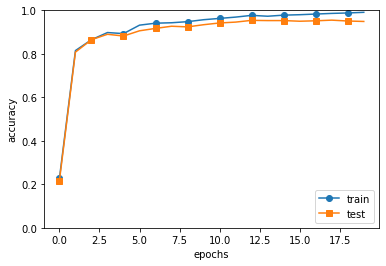

In [53]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)


# 시간이 오래 걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

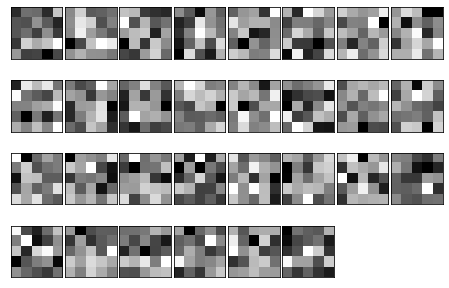

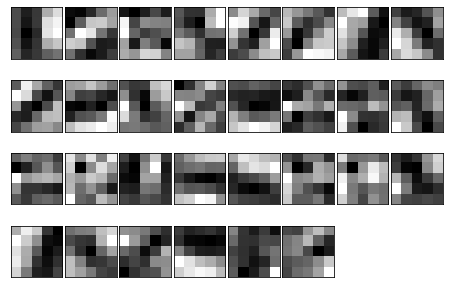

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])

# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])